In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/tips (data for regression problem) (1).csv")

In [3]:
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [5]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [6]:
df = pd.get_dummies(df, drop_first=True)

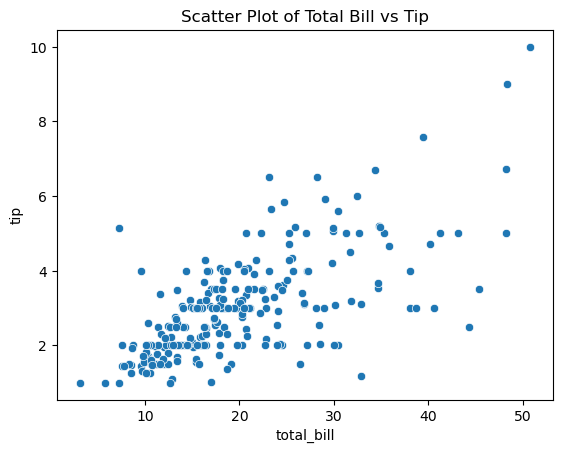

In [7]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


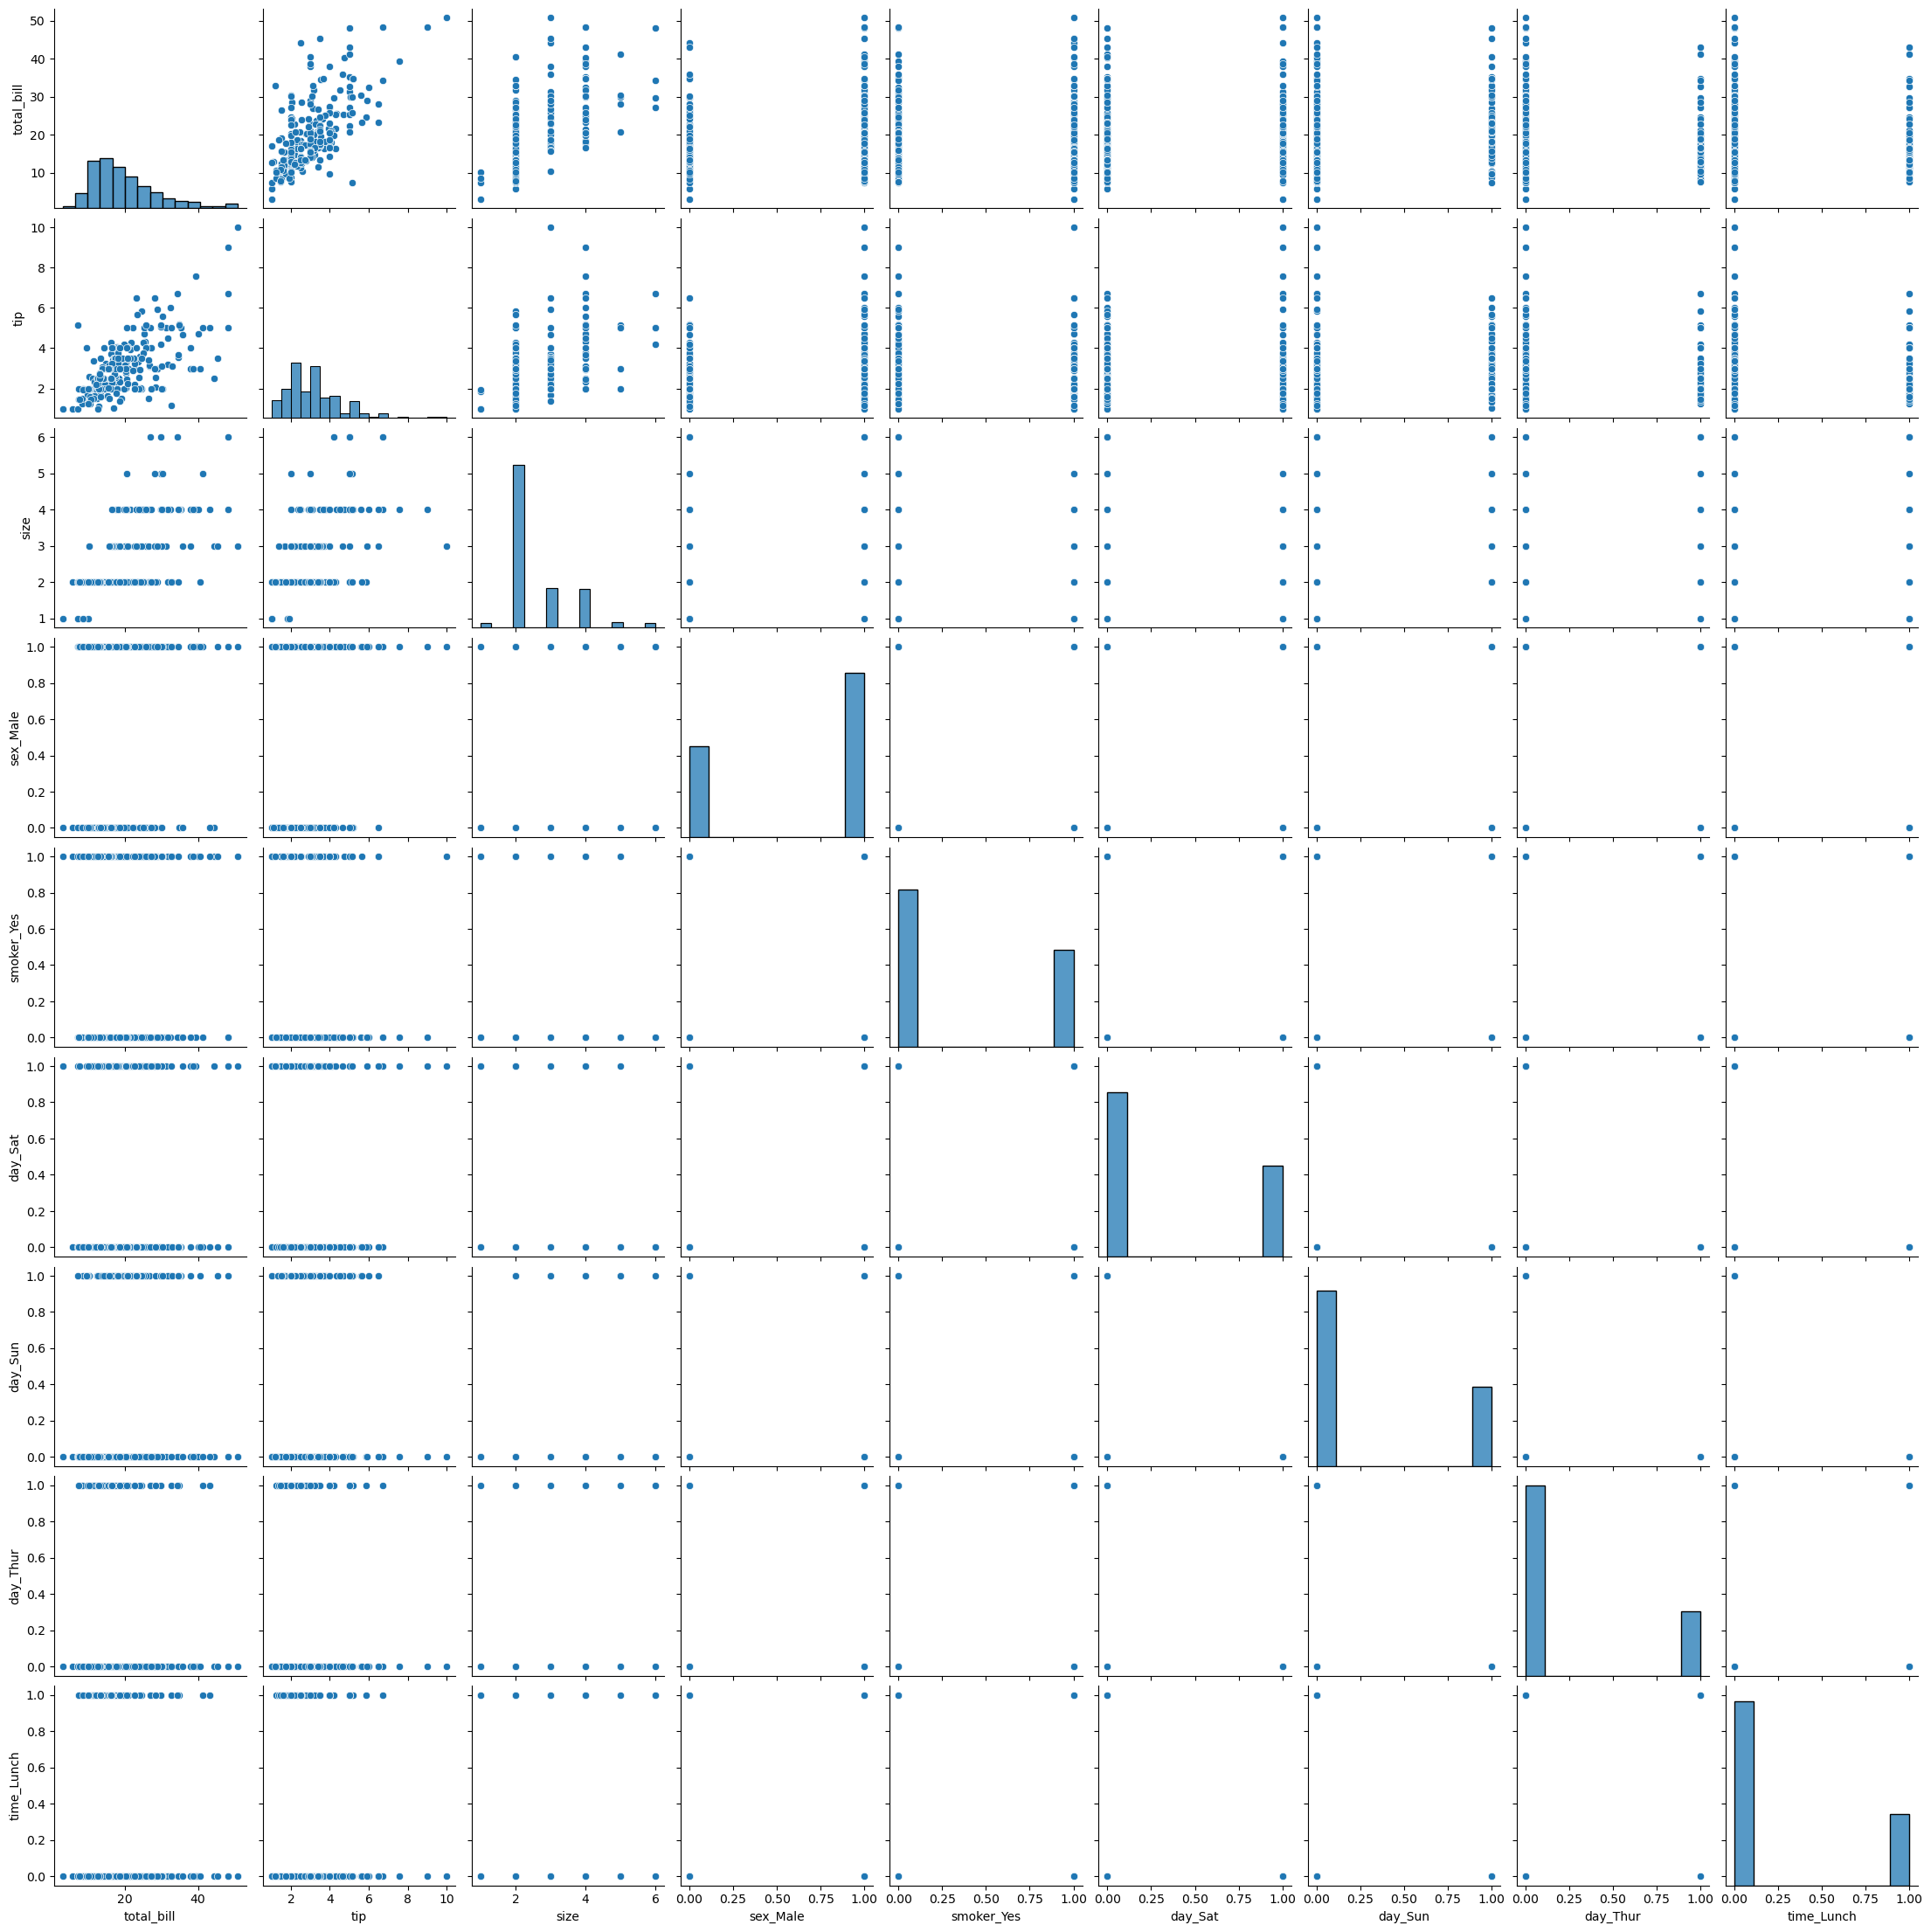

In [8]:
sns.pairplot(df)
plt.show()

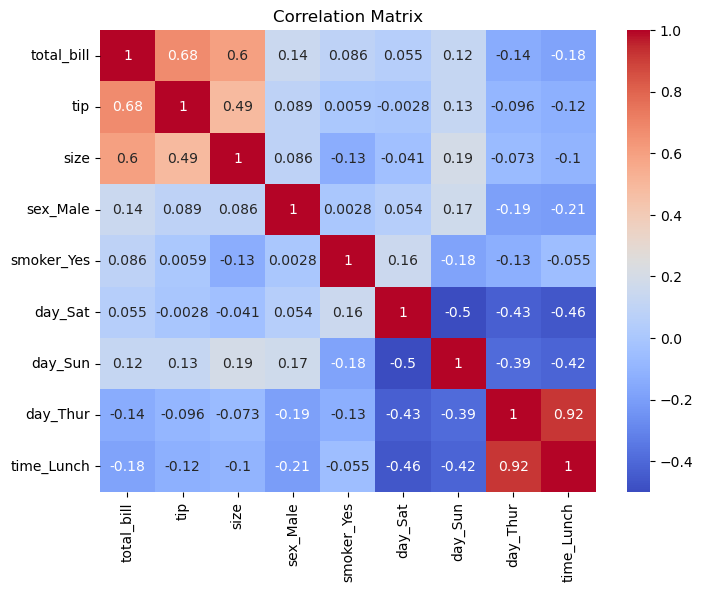

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
print("Columns and data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Encode categorical columns if necessary
df = pd.get_dummies(df, drop_first=True)

# Define the target variable and predictors
y = df['tip']
X = df.drop(columns='tip')

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model and check if it runs successfully
try:
    model = sm.OLS(y, X).fit()
    print("Model fitted successfully.")
    
    # Perform the Rainbow test for linearity
    rainbow_statistic, rainbow_p_value = linear_rainbow(model)
    print("Rainbow test statistic:", rainbow_statistic)
    print("Rainbow test p-value:", rainbow_p_value)
except Exception as e:
    print("An error occurred:", e)


Columns and data types:
 total_bill    float64
tip           float64
size            int64
sex_Male         bool
smoker_Yes       bool
day_Sat          bool
day_Sun          bool
day_Thur         bool
time_Lunch       bool
dtype: object

Missing values:
 total_bill    0
tip           0
size          0
sex_Male      0
smoker_Yes    0
day_Sat       0
day_Sun       0
day_Thur      0
time_Lunch    0
dtype: int64
An error occurred: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).


In [22]:
preds = model.predict(X)
residuals = y - preds
sns.residplot(x=preds, y=residuals, lowess=True, color="g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

NameError: name 'model' is not defined

In [23]:
X = df.drop('tip', axis=1)
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [25]:
metrics = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics[model_name] = {"MSE": mse, "MAE": mae, "R2": r2}
    
    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}")

Linear Regression - MSE: 0.7033566017436106, MAE: 0.6671331480264895, R2: 0.43730181943482493
Ridge Regression - MSE: 0.7007477213216071, MAE: 0.6665379965588626, R2: 0.43938897161784884
Lasso Regression - MSE: 0.5908528649971526, MAE: 0.6374841046500828, R2: 0.5273068720881754
Decision Tree - MSE: 1.2551938775510205, MAE: 0.8295918367346939, R2: -0.004178121600921791
Random Forest - MSE: 0.9196720148979602, MAE: 0.7557163265306125, R2: 0.2642455218065466
Support Vector Regression - MSE: 0.5323763062616395, MAE: 0.5679864502285389, R2: 0.5740891915042663
K-Nearest Neighbors - MSE: 0.8763725714285714, MAE: 0.718857142857143, R2: 0.29888587066985495


In [26]:
# Display metrics for comparison
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

                                MSE       MAE        R2
Linear Regression          0.703357  0.667133  0.437302
Ridge Regression           0.700748  0.666538  0.439389
Lasso Regression           0.590853  0.637484  0.527307
Decision Tree              1.255194  0.829592 -0.004178
Random Forest              0.919672  0.755716  0.264246
Support Vector Regression  0.532376  0.567986  0.574089
K-Nearest Neighbors        0.876373  0.718857  0.298886


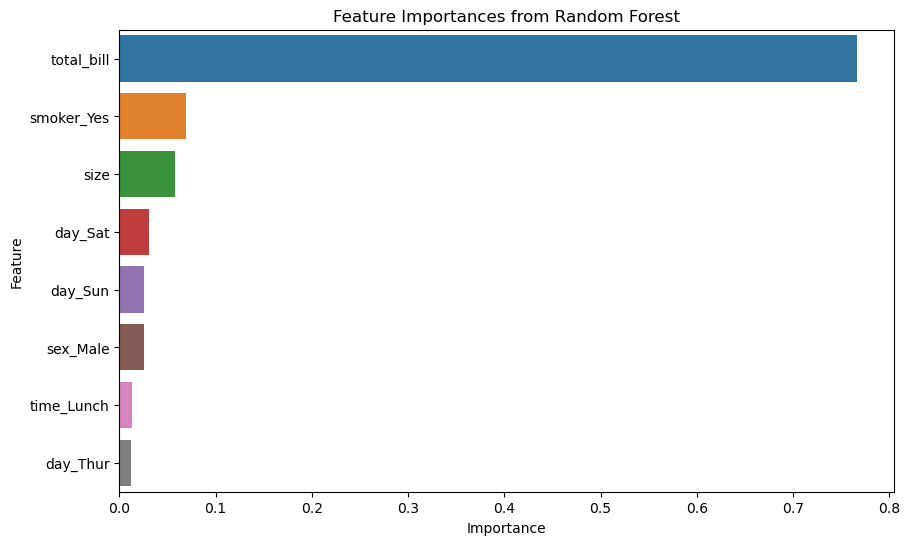

In [27]:
# Insights for Management
# Feature Importance (for models that support it)
if hasattr(models["Random Forest"], "feature_importances_"):
    feature_importances = models["Random Forest"].feature_importances_
    feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
    plt.title("Feature Importances from Random Forest")
    plt.show()

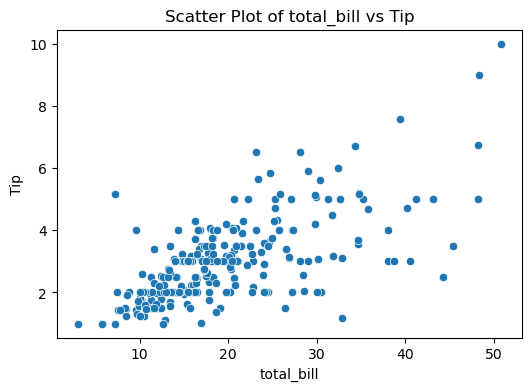

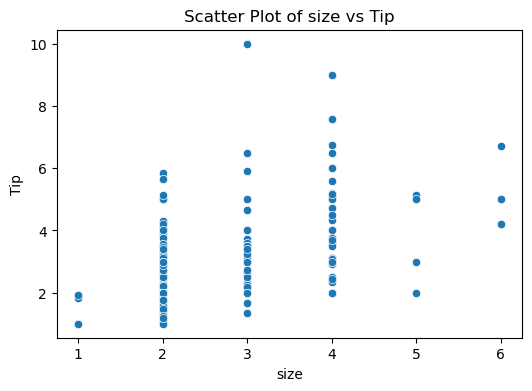

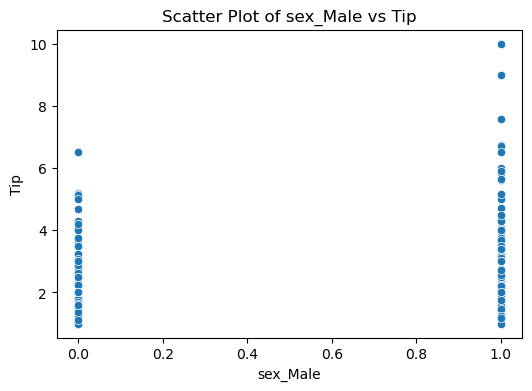

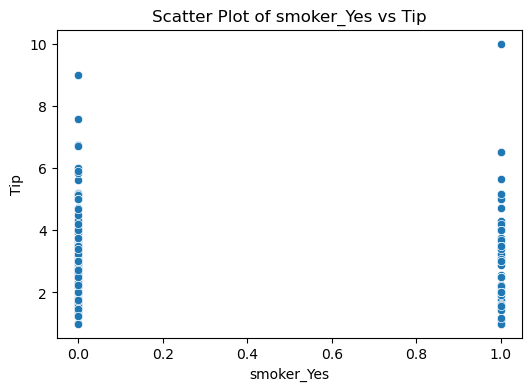

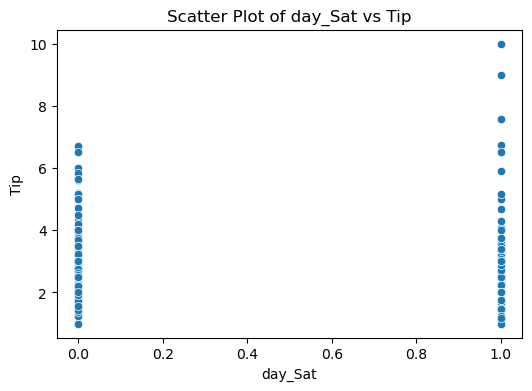

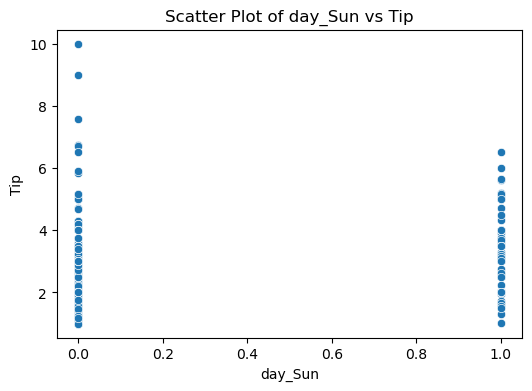

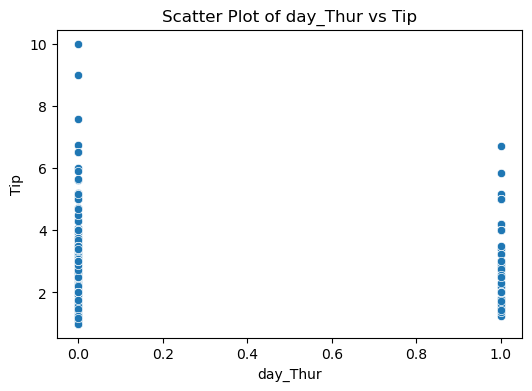

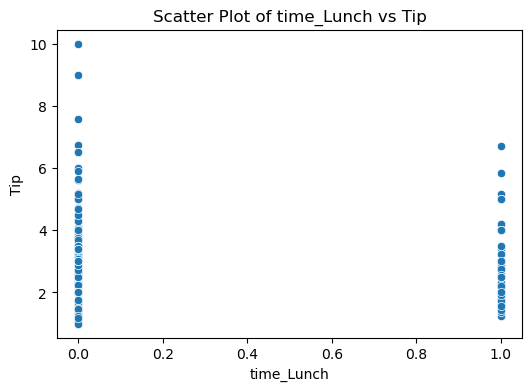

In [32]:
for column in df.columns:
    if column != 'tip':  # Exclude the target variable from predictors
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[column], y=df['tip'])
        plt.title(f'Scatter Plot of {column} vs Tip')
        plt.xlabel(column)
        plt.ylabel('Tip')
        plt.show()